# Load and explore the nCov2019 dataset (outside Hubei)

In [1]:
ncov_outside_hubei = catalog.load("raw_ncov_outside_hubei")
ncov_outside_hubei

2020-03-16 09:07:34,409 - kedro.io.data_catalog - INFO - Loading data from `raw_ncov_outside_hubei` (CSVDataSet)...


,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1,30,male,"Chaohu City, Hefei City",Anhui,China,1,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2,47,male,"Baohe District, Hefei City",Anhui,China,1,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5,50,female,"Feidong County, Hefei City",Anhui,China,1,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14597,14933,NaN,NaN,Agra,Uttar Pradesh,India,1,27.180000,78.020000,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14598,14934,NaN,NaN,Agra,Uttar Pradesh,India,1,27.180000,78.020000,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14599,14935,NaN,NaN,Agra,Uttar Pradesh,India,1,27.180000,78.020000,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14600,14936,NaN,NaN,NaN,Telangana,India,1,17.366000,78.475000,admin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
ncov_outside_hubei.dtypes

ID                            int64
age                          object
sex                          object
city                         object
province                     object
country                      object
wuhan(0)_not_wuhan(1)         int64
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary      float64
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                      

`date_onset_symptoms` and `date_admission_hospital` are too sparse.

In [3]:
ncov_outside_hubei.date_onset_symptoms.value_counts(dropna=False)

NaN           13847
22.01.2020       43
25.01.2020       42
24.01.2020       41
26.01.2020       36
              ...  
29.12.2019        1
27.02.2020        1
20.02.220         1
none              1
02.01.2020        1
Name: date_onset_symptoms, Length: 66, dtype: int64

In [4]:
ncov_outside_hubei.date_admission_hospital.value_counts(dropna=False)

NaN                        13853
30.01.2020                    45
31.01.2020                    41
22.01.2020                    40
01.02.2020                    37
21.01.2020                    36
27.01.2020                    35
23.01.2020                    34
26.01.2020                    32
03.02.2020                    31
25.01.2020                    31
24.01.2020                    28
20.01.2020                    28
04.02.2020                    26
28.01.2020                    26
29.01.2020                    22
06.02.2020                    17
02.02.2020                    16
07.02.2020                    15
05.02.2020                    15
19.01.2020                    14
12.02.2020                    13
21.02.2020                    13
14.02.2020                    10
24.02.2020                     9
10.02.2020                     9
25.02.2020                     8
18.01.2020                     8
10.01.2020                     7
27.02.2020                     6
19.02.2020

In [5]:
ncov_outside_hubei.date_confirmation.value_counts(dropna=False)

29.01.2020               1091
03.02.2020               1020
31.01.2020                813
05.02.2020                802
04.02.2020                749
27.01.2020                729
01.02.2020                714
02.02.2020                679
06.02.2020                613
08.02.2020                525
07.02.2020                523
26.01.2020                440
28.02.2020                437
27.02.2020                427
01.03.2020                427
30.01.2020                424
26.02.2020                372
22.02.2020                306
25.01.2020                292
13.02.2020                257
25.02.2020                224
15.02.2020                222
29.02.2020                214
24.02.2020                209
16.02.2020                203
14.02.2020                188
28.01.2020                179
23.02.2020                158
17.02.2020                148
02.03.2020                143
24.01.2020                142
18.02.2020                110
NaN                       100
10.02.2020

## Type date columns

In [6]:
import pandas as pd

for column in ncov_outside_hubei.columns:
    if column.startswith("date"):
        ncov_outside_hubei[column] = pd.to_datetime(ncov_outside_hubei[column], errors="coerce", dayfirst=True)

## Drop rows where confirmation date is after death or discharge date

TODO(deepyaman): Handle cases where confirmation date is after death or discharge date.

In [7]:
ncov_outside_hubei[ncov_outside_hubei.date_confirmation > ncov_outside_hubei.date_death_or_discharge]

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
175,178,NaN,NaN,Suihua City,Heilongjiang,China,1,46.900840,126.648700,admin2,...,died,2020-01-23,NaN,NaN,NaN,Suihua City,Heilongjiang,China,231200,NaN
647,654,32,male,Kathmandu,NaN,Nepal,1,27.717200,85.324000,point,...,discharged,2020-01-17,NaN,Kathmandu,NaN,NaN,Province No.-3,Nepal,3,NaN
5073,5143,38,NaN,Beijing,Beijing,China,1,40.185350,116.415100,admin2,...,discharged,2020-02-02,NaN,NaN,NaN,Beijing,Beijing,China,110100,NaN
6074,6352,60,female,Cebu City,Cebu,Philippines,1,10.378930,123.776300,point,...,discharged,2020-01-30,NaN,Cebu City,NaN,NaN,Cebu,Philippines,25,NaN
14503,14839,80-89,female,Seattle,Washington,United States,1,47.609722,-122.333056,point,...,died,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14504,14840,50-59,male,Seattle,Washington,United States,1,47.609722,-122.333056,point,...,died,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
ncov_outside_hubei_filtered = ncov_outside_hubei[
    ~(ncov_outside_hubei.date_confirmation > ncov_outside_hubei.date_death_or_discharge)
    & ncov_outside_hubei.date_confirmation.notna()
]

# Get data in the right format

In [9]:
start_dates = ncov_outside_hubei_filtered.date_confirmation
end_dates = ncov_outside_hubei_filtered.date_death_or_discharge

In [10]:
from lifelines.utils import datetimes_to_durations

T, E = datetimes_to_durations(start_dates, end_dates, freq="D")
pd.DataFrame({"T": T, "E": E})[E]

,T,E
18,3.0,True
36,8.0,True
142,4.0,True
271,10.0,True
546,18.0,True
...,...,...
11632,9.0,True
11635,3.0,True
11691,3.0,True
13033,3.0,True


In [11]:
# pd.DataFrame({"T": T, "E": E}).groupby("E")["T"].value_counts()
with pd.option_context("display.max_rows", -1):
    print(pd.DataFrame({"T": T, "E": E}).groupby("E")["T"].value_counts())


E      T        1089
False  47.0     1011
       42.0      808
       45.0      799
       40.0      746
       41.0      726
       49.0      712
       44.0      676
       43.0      608
       39.0      523
       37.0      522
       38.0      437
       17.0      437
       50.0      427
       15.0      426
       18.0      420
       46.0      372
       19.0      304
       23.0      288
       51.0      253
       32.0      223
       20.0      219
       30.0      214
       16.0      209
       21.0      202
       29.0      185
       31.0      178
       48.0      158
       22.0      147
       28.0      143
       14.0      135
       52.0      110
       27.0       95
       35.0       91
       53.0       84
       33.0       69
       36.0       64
       34.0       59
       13.0       49
       25.0       45
       24.0       42
       54.0       36
       55.0       24
       12.0       24
       26.0       11
       56.0        1
       57.0        1
       59.0 

## Drop long durations

[1st known case of coronavirus traced back to November in China](https://www.livescience.com/first-case-coronavirus-found.html), so durations longer than that indicate data quality issues.

In [12]:
duration_filter = T < 365
E = E[duration_filter]
T = T[duration_filter]

# Analyze survival!

In [13]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(T, E)

2020-03-16 10:24:22,503 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 14489 total observations, 14404 right-censored observations>

In [14]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.999379
1.0,0.999172
2.0,0.999103
3.0,0.998689
4.0,0.998551
...,...
56.0,0.993949
57.0,0.993949
59.0,0.993949


In [15]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000621
1.0,0.000828
2.0,0.000897
3.0,0.001311
4.0,0.001449
...,...
56.0,0.006051
57.0,0.006051
59.0,0.006051


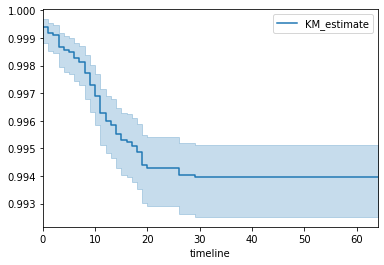

In [16]:
kmf.plot_survival_function()

/anaconda3/envs/inauditus/lib/python3.7/site-packages/lifelines/fitters/__init__.py:941: StatisticalWarning: The diagonal of the variance_matrix_ has negative values. This could be a problem with GeneralizedGammaFitter's fit to the data.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

To fix this, try specifying an `initial_point` kwarg in `fit`.

  warnings.warn(warning_text, utils.StatisticalWarning)
/anaconda3/envs/inauditus/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/envs/inauditus/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colN

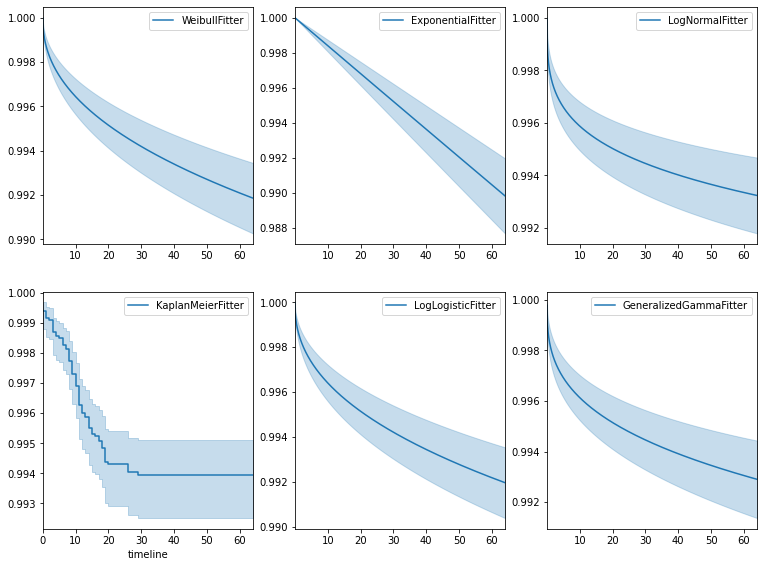

In [17]:
import matplotlib.pyplot as plt
from lifelines import *

fig, axes = plt.subplots(2, 3, figsize=(12.8, 9.6))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')

T[T == 0] += 1e-6  # Other models do not allow for non-positive durations; add a small positive value to zero elements.

wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
ggf.plot_survival_function(ax=axes[1][2])